In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

In [3]:
read_path = "hotels-vienna.csv"
df = pd.read_csv(read_path)

In [4]:
df.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,216.0,1,21894,1,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,708.0,0,21897,1,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,629.0,0,21901,1,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,52.0,0,21902,1,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,219.0,1,21903,1,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9


In [5]:
len(df.columns)

24

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             428 non-null    object 
 1   city_actual         428 non-null    object 
 2   rating_count        393 non-null    float64
 3   center1label        428 non-null    object 
 4   center2label        428 non-null    object 
 5   neighbourhood       428 non-null    object 
 6   price               428 non-null    int64  
 7   city                428 non-null    object 
 8   stars               428 non-null    float64
 9   ratingta            325 non-null    float64
 10  ratingta_count      325 non-null    float64
 11  scarce_room         428 non-null    int64  
 12  hotel_id            428 non-null    int64  
 13  offer               428 non-null    int64  
 14  offer_cat           428 non-null    object 
 15  year                428 non-null    int64  
 16  month   

In [7]:
df.isna().sum()

country                 0
city_actual             0
rating_count           35
center1label            0
center2label            0
neighbourhood           0
price                   0
city                    0
stars                   0
ratingta              103
ratingta_count        103
scarce_room             0
hotel_id                0
offer                   0
offer_cat               0
year                    0
month                   0
weekend                 0
holiday                 0
distance                0
distance_alter          0
accommodation_type      0
nnights                 0
rating                 35
dtype: int64

In [8]:
df.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,393.000000,428.000000,428.000000,325.000000,325.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,393.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,191.217435,91.580545,0.772278,0.482638,586.874582,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.577444
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,27.000000,83.000000,3.000000,3.500000,129.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,84.000000,109.500000,3.500000,4.000000,335.000000,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,203.000000,146.000000,4.000000,4.500000,811.000000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.400000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


In [9]:
df["city"].unique()

array(['Vienna'], dtype=object)

In [10]:
df["neighbourhood"].unique()

array(['17. Hernals', 'Alsergrund', 'Donaustadt', 'Favoriten',
       'Fischamend', 'Graben', 'Innere Stadt', 'Josefstadt',
       'Kaerntner Strasse', 'Landstrasse', 'Leopoldstadt', 'Margareten',
       'Mariahilf', 'Neubau', 'Ottakring', 'Rudolfsheim-Funfhaus',
       'Schonbrunn', 'Schwechat', 'Vienna', 'Voesendorf', 'Wahring',
       'Wieden'], dtype=object)

In [11]:
df["neighbourhood"].value_counts()

Innere Stadt            84
Vienna                  43
Leopoldstadt            41
Landstrasse             32
Josefstadt              26
Mariahilf               25
Wieden                  22
Favoriten               22
Rudolfsheim-Funfhaus    21
Neubau                  21
Alsergrund              17
Margareten              16
Schonbrunn              14
Kaerntner Strasse       10
Donaustadt               9
Schwechat                7
Ottakring                5
Wahring                  5
Graben                   3
Voesendorf               2
17. Hernals              2
Fischamend               1
Name: neighbourhood, dtype: int64

In [12]:
df[["price","distance"]].describe()

,price,distance
count,428.000000,428.000000
mean,131.366822,1.658879
std,91.580545,1.595673
min,27.000000,0.000000
25%,83.000000,0.700000
50%,109.500000,1.300000
75%,146.000000,2.000000
max,1012.000000,13.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

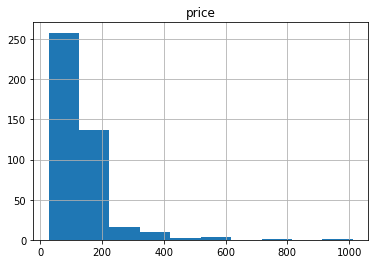

In [13]:
df[["price"]].hist()

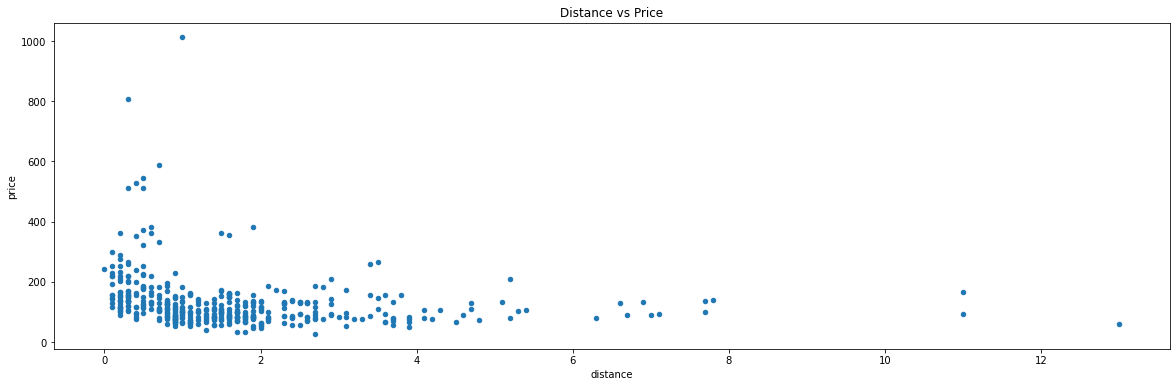

In [14]:
df[["price","distance"]].plot.scatter(x="distance", y="price", figsize=(20,6))
plt.title("Distance vs Price")
plt.show()

We note the most expensive hotels are near the city center and the ones further away from th city center are some of the cheapest one.

The expensive hotels are the ones more than 700 euros 

In [15]:
cond = df["price"]>700
df[cond]

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
61,Austria,Vienna,5.0,City centre,Donauturm,Innere Stadt,806,Vienna,5.0,4.5,114.0,0,21976,1,15-50% offer,2017,11,0,0,0.3,2.8,Hotel,1,4.5
300,Austria,Vienna,77.0,City centre,Donauturm,Neubau,1012,Vienna,3.0,4.0,364.0,1,22252,1,1-15% offer,2017,11,0,0,1.0,3.8,Hotel,1,4.3


#### What is the average price per neighbourhood?

<AxesSubplot:xlabel='neighbourhood'>

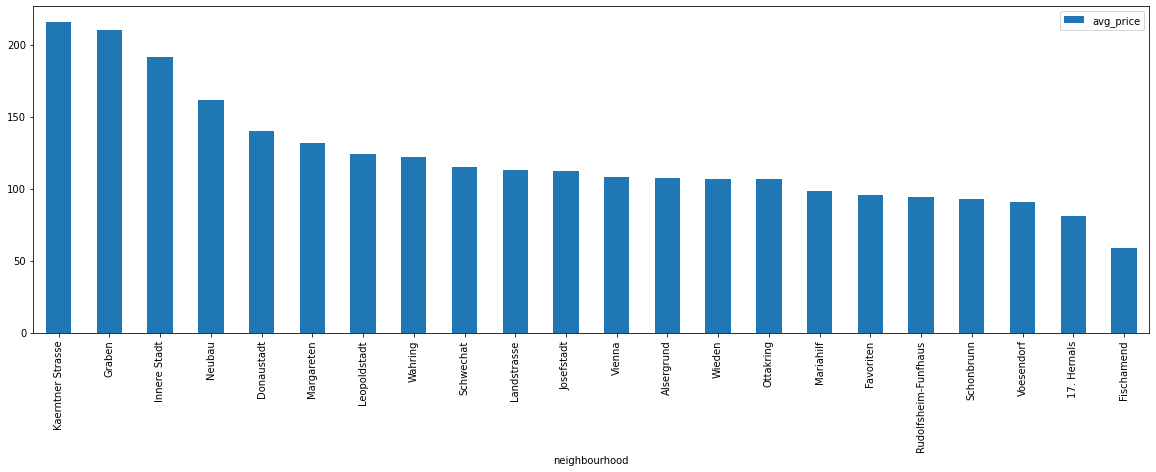

In [16]:
(df[["price","neighbourhood"]]
 .groupby("neighbourhood")
 .mean()
 .rename(columns={"price":"avg_price"})
 .sort_values("avg_price", ascending=False)
 .plot.bar(figsize=(20,6))
)

In [17]:
columns_to_fill = ['rating_count', 'rating','ratingta','ratingta_count']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [18]:
df.isna().sum()

country               0
city_actual           0
rating_count          0
center1label          0
center2label          0
neighbourhood         0
price                 0
city                  0
stars                 0
ratingta              0
ratingta_count        0
scarce_room           0
hotel_id              0
offer                 0
offer_cat             0
year                  0
month                 0
weekend               0
holiday               0
distance              0
distance_alter        0
accommodation_type    0
nnights               0
rating                0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             428 non-null    object 
 1   city_actual         428 non-null    object 
 2   rating_count        428 non-null    float64
 3   center1label        428 non-null    object 
 4   center2label        428 non-null    object 
 5   neighbourhood       428 non-null    object 
 6   price               428 non-null    int64  
 7   city                428 non-null    object 
 8   stars               428 non-null    float64
 9   ratingta            428 non-null    float64
 10  ratingta_count      428 non-null    float64
 11  scarce_room         428 non-null    int64  
 12  hotel_id            428 non-null    int64  
 13  offer               428 non-null    int64  
 14  offer_cat           428 non-null    object 
 15  year                428 non-null    int64  
 16  month   

The correlation between Price and Rating is: -0.0344839175485459


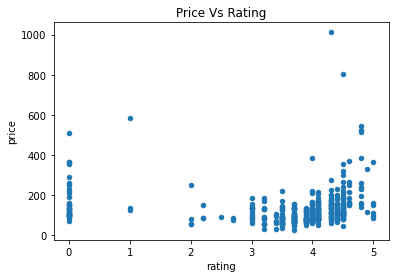

In [20]:
#Show relation of price and rating
df.plot.scatter(x = 'rating', y= 'price', title='Price Vs Rating')

# Calculate the correlation between Price and Customer Rating
correlation = df['price'].corr(df['rating'])

print(f"The correlation between Price and Rating is: {correlation}")


As per above graph, there is no linear relationship between price and rating.

<AxesSubplot:title={'center':'Accomodation Type Vs Rating'}, xlabel='accommodation_type', ylabel='price'>

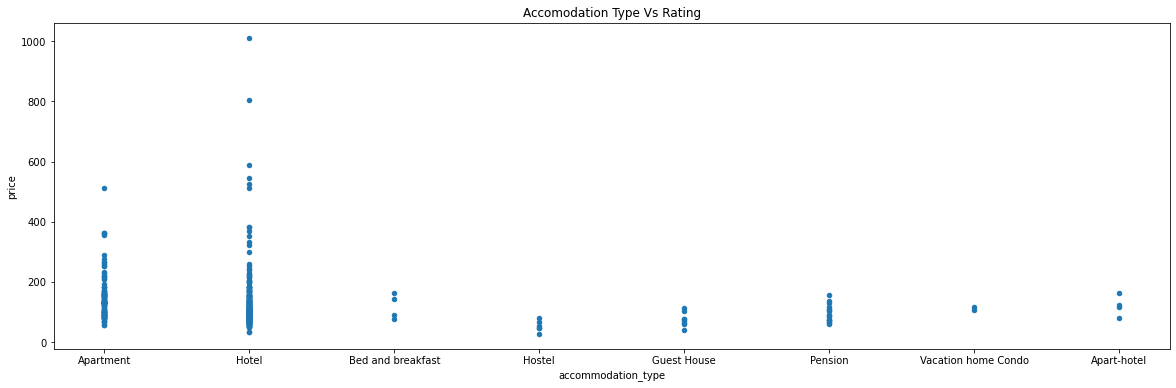

In [21]:
#Show relation of price and accommodation_type
df.plot.scatter(x = 'accommodation_type', y= 'price', title='Accomodation Type Vs Rating', figsize=(20,6))

In [72]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [41]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df[["rating" ,"distance"]]
Y = df["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train) 
prediction = lr.predict(X_test)     
prediction          

array([136.46127652, 160.54844397, 141.92382516, 123.19328462,
       104.24610823, 127.13131349, 140.45226626, 129.7743197 ,
       149.49497896, 126.87937041, 134.32215648, 148.70384246,
       141.76494255, 141.8002498 , 123.19328462, 137.82691368,
        50.79862218, 146.27747209, 143.25415508, 123.40992045,
       139.37387943, 132.73988348, 100.81196552, 146.27747209,
       140.48757351, 134.32215648, 139.37387943, 122.88838066,
       128.4616434 , 120.74926062, 160.54844397, 124.47065366,
       128.74889374, 149.74692204, 129.7743197 , 149.76457567,
       145.305007  ,  50.79862218, 126.68038819, 140.97380605,
       134.08786702, 131.40955357, 147.62545563, 142.84332938,
       129.95085593, 143.63446588, 130.06157003, 160.54844397,
       141.78259618,  92.05650316, 129.54003024, 142.84332938,
       136.44362289, 115.42794096, 117.9778867 , 103.20302865,
       139.26316533, 147.62545563, 150.01651875, 160.54844397,
       139.64347614, 128.74889374, 147.10391584, 147.62

In [55]:
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
rmse = mse ** 0.5  
print(f"RMSE: {rmse}, R-squared: {r2}") 

RMSE: 68.83579060130336, R-squared: 0.0109832380916417


In [51]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit a random forest

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, Y_train)

# Make predictions
predictions_forest = forest.predict(X_test)
predictions_forest

array([ 81.96678571, 175.2619242 , 237.03138889, 122.576     ,
       147.90316667, 114.2435    ,  84.49855159, 133.49      ,
       151.53359524,  95.96985354, 114.54066667, 150.62647619,
       166.0605    ,  81.03272222, 122.576     ,  64.94      ,
       124.3       , 490.96669444, 136.30666667,  79.63966667,
       156.29466667,  99.19766667,  76.9       , 490.96669444,
        67.358     , 114.54066667, 156.29466667,  94.48516667,
       110.0265    ,  89.7212381 , 175.2619242 ,  71.48683333,
        71.51116667, 245.75366667, 133.49      , 156.12359524,
        85.97466667, 124.3       ,  94.82      , 287.36016667,
        77.925     , 103.22166667, 171.69766667,  89.196     ,
       108.35452381, 127.74033333,  92.89516667, 175.2619242 ,
       122.77372619, 132.        ,  91.4405    ,  89.196     ,
       102.48085281,  97.5055    , 109.55285714,  91.21      ,
       154.74333333, 171.69766667, 169.59071429, 175.2619242 ,
       300.063     ,  71.51116667, 132.51083333, 171.69

In [60]:
mse = mean_squared_error(Y_test, predictions_forest)
r2 = r2_score(Y_test, predictions_forest)
rmse = mse ** 0.5
print(f"RMSE: {rmse}, R-squared: {r2}") 

RMSE: 61.62669870893047, R-squared: 0.2072927145408251


In [58]:
from sklearn.svm import SVR
 

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, Y_train)

# Make predictions
predictions_SVR = svr_model.predict(X_test_scaled)
predictions_SVR

array([103.51851835, 117.53290885, 116.90840523,  90.72646172,
        99.01575966, 104.2729187 , 108.00488991, 115.37205718,
       119.54380365,  96.55405763, 107.5238461 , 114.71650191,
       119.96022337, 100.08334311,  90.72646172,  93.40165843,
       109.67978067, 127.98733784, 117.08500465,  99.4859849 ,
       115.40732813,  97.83204991,  96.58646435, 127.98733784,
        94.99268077, 107.5238461 , 115.40732813,  94.24036508,
       105.50899291,  97.95587053, 117.53290885, 102.06165124,
        94.61865755, 126.68128791, 115.37205718, 117.75218973,
       101.47285159, 109.67978067,  99.7451855 , 115.12579893,
        92.48437246,  96.66530718, 121.84175681, 112.89811068,
       114.82604495, 118.01981861, 105.07627578, 117.53290885,
       109.5179681 , 102.81344948,  98.63888131, 112.89811068,
       114.10202126,  96.20450604, 112.64475315,  95.56555508,
       116.51119261, 121.84175681, 125.37282355, 117.53290885,
       113.616919  ,  94.61865755, 115.25996932, 121.84

In [63]:
mse = mean_squared_error(Y_test, predictions_SVR)
r2 = r2_score(Y_test, predictions_SVR)
rmse = mse ** 0.5
print(f"RMSE: {rmse}, R-squared: {r2}") 

RMSE: 69.31889638036554, R-squared: -0.002947781353279666
